In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer 


In [2]:
data=pd.read_csv('Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# label -> 0 means negative feedback, label-> 1 means positive feedback 
# lets visualize the data 

In [14]:
data.shape

(40000, 2)

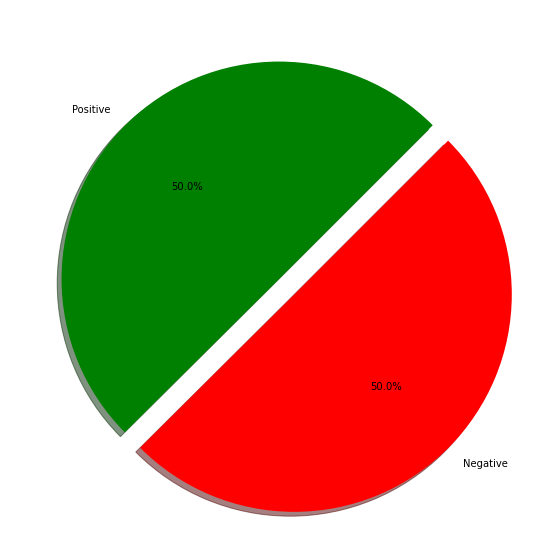

In [3]:
fig=plt.figure(figsize=(10,10)) 
colors=["green","red"] 
pos=data[data['label']==1] 
neg=data[data['label']==0] 
ck=[pos['label'].count(),neg['label'].count()] 
legpie=plt.pie(ck,labels=["Positive","Negative"],
               autopct='%1.1f%%',shadow=True,colors=colors,startangle=45,explode=(0,0.1))


Import RE that is regular expression 
using this library, remove html tags like '<a>' or . with empty string 
also modify emojis/emoticons which can be smileys :), a sad face :( or even a upset face :/. 
we will change emojis at the end to get a clean set of text 



In [4]:
import re 
def preprocessor(text):
  text=re.sub('<[^>]*>','',text) 
  emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text) 
  text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
  return text 

data['text']=data['text'].apply(preprocessor)

Now using nltk 's PorterStemmer to simplyfy the data and remove unnecessary comlexities
in our data

In [5]:
from nltk.stem.porter import PorterStemmer 
porter= PorterStemmer() 
def tokenizer(text):
  return text.split() 

def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]

Visualizing Negative and Positive Words using a wordcloud
First remove the stopwords 

In [6]:
# pip install wordcloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


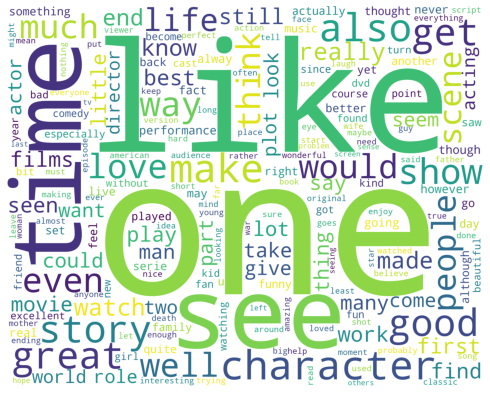

Negative words are as follows


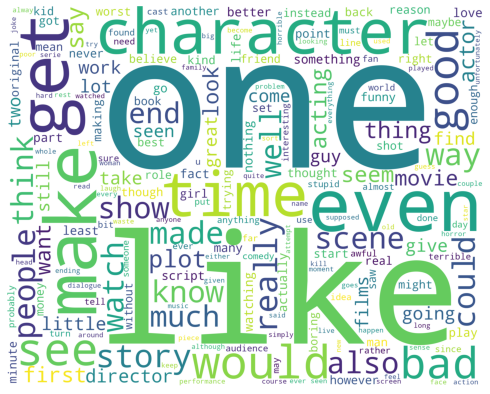

In [7]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
stop=stopwords.words('english') 

from wordcloud import WordCloud 
positivedata=data[data['label']==1] 
positivedata=positivedata['text'] 
negdata=data[data['label']==0] 
negdata=negdata['text'] 

def wordcloud_draw(data,color='white'):
  words=' '.join(data) 
  cleaned_word=" ".join([word for word in words.split() if(word!='movie' and word!='film')])
  wordcloud=WordCloud(stopwords=stop,background_color=color,width=2500, height=2000).generate(cleaned_word)
  plt.figure(1,figsize=(10,7)) 
  plt.imshow(wordcloud) 
  plt.axis('off') 
  plt.show() 

print("Positive words are as follows") 
wordcloud_draw(positivedata,'white')
print("Negative words are as follows") 
wordcloud_draw(negdata)

Now, use TF-IDF vectorizer to convert the raw documents into feature 
matrix which is very important to train a machine learning mdoel. 


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,
                      use_idf=True,norm='l2',smooth_idf=True) 
y=data.label.values 
x=tfidf.fit_transform(data.text)


C:\Users\prasa\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Now train a machine learning model taking
train =75% and test=25%

In [9]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25,shuffle=False)

Training machine learning model for the task of sentiment analysis 
by using the Logistic regression model:


In [10]:
from sklearn.linear_model import LogisticRegressionCV 
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(x_train,y_train) 
y_pred=clf.predict(x_test) 
from sklearn import metrics 

# Model accuracy
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  3.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.3min finished


Accuracy:  0.8984


In [11]:
print("Confusion matrix: ",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix:  [[4446  526]
 [ 490 4538]]
